In [48]:
import pyodbc
import pandas as pd
import numpy as np
import seaborn as sns

In [49]:
conn = pyodbc.connect(r'Driver={Microsoft Access Driver (*.mdb, *.accdb)};DBQ=C:\Users\manji\OneDrive\Documents\Telecom_Fraud_Detection-development\Telecom_Fraud_Detection-development\source\TelecomFraudDetection_Api\datasets\CDR\CDR_Data.mdb;')

In [50]:
SQL_Query = pd.read_sql_query(
    '''SELECT 
        cusCall.callID, 
        cusCall.customerPhoneNumber, 
        cusCall.startDate,
        cusCall.endDate,
        cusCall.callStart,
        cusCall.callEnd,
        cusCall.callType,
        cusCall.callCost,
        cusInfo.incomingCalls,
        cusInfo.modelID,
        mdl.fraudulent
        FROM ((customerCalls cusCall
        INNER JOIN customerinformation cusInfo ON 
        cusCall.customerphoneNumber = cusInfo.customerphoneNumber)
        INNER JOIN model mdl ON mdl.modelID = cusInfo.modelID)
    ''', conn)

df_data = pd.DataFrame(SQL_Query)
df_data.head()

,callID,customerPhoneNumber,startDate,endDate,callStart,callEnd,callType,callCost,incomingCalls,modelID,fraudulent
0,1,0296393418,2013-01-02,2013-01-02,1899-12-30 06:25:00,1899-12-30 06:28:00,National,15.113445,250,1,False
1,2,0296393418,2013-10-02,2013-10-02,1899-12-30 10:00:00,1899-12-30 10:05:00,National,23.026891,250,1,False
2,3,0296393418,2013-01-20,2013-01-20,1899-12-30 16:45:00,1899-12-30 17:12:00,Local,27.176660,250,1,False
3,4,0296393418,2013-01-21,2013-01-21,1899-12-30 20:35:00,1899-12-30 20:58:00,Local,23.828167,250,1,False
4,5,0296393418,2013-02-03,2013-02-03,1899-12-30 21:20:00,1899-12-30 21:51:00,Local,31.088230,250,1,False


In [38]:
raw = df_data.copy()

In [39]:
df_data['startDate_months'] = df_data.startDate.dt.month
df_data['endDate_months'] = df_data.endDate.dt.month
df_data['callStart_months'] = df_data.callStart.dt.month
df_data['callEnd_months'] = df_data.callEnd.dt.month
df_data['startDate_day_of_months'] = df_data.startDate.dt.day
df_data['endDate_day_of_months'] = df_data.endDate.dt.day
df_data['callStart_day_of_months'] = df_data.callStart.dt.day
df_data['callEnd_day_of_months'] = df_data.callEnd.dt.day
df_data['startDate_year'] = df_data.startDate.dt.year
df_data['endDate_year'] = df_data.endDate.dt.year
df_data['callStart_year'] = df_data.callStart.dt.year
df_data['callEnd_year'] = df_data.callEnd.dt.year
df_data['callStart_hour'] = df_data.callStart.dt.hour
df_data['callEnd_hour'] = df_data.callEnd.dt.hour
df_data['callStart_minute'] = df_data.callStart.dt.minute
df_data['callEnd_minute'] = df_data.callEnd.dt.minute
df_data['callStart_second'] = df_data.callStart.dt.second
df_data['callEnd_second'] = df_data.callEnd.dt.second

In [40]:
for i in range(0,1109344):
    if df_data['callStart_hour'][i]>df_data['callEnd_hour'][i]:
        df_data['callEnd'][i] = df_data['callEnd'][i] + pd.Timedelta(days=1)

C:\Users\manji\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [41]:
df_data['duration'] = (df_data['callEnd'] - df_data['callStart'])

In [42]:
df_data['duration'] = df_data['duration'] / np.timedelta64(1, 's')

In [43]:
df_data['duration'] = df_data['duration'].astype(int)

In [44]:
df_data.drop(['customerPhoneNumber','callID','callStart',
       'callEnd', 'callStart_months','callEnd_months','callStart_day_of_months', 'callEnd_day_of_months', 'callStart_year', 'callEnd_year', 'callStart_hour',
       'callEnd_hour', 'callStart_minute', 'callEnd_minute',
       'callStart_second', 'callEnd_second','endDate','startDate','modelID','incomingCalls'],axis = 1, inplace=True)

In [45]:
df = df_data.drop(['callType','fraudulent'],axis=1)

In [46]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
df.head()

,callCost,startDate_months,endDate_months,startDate_day_of_months,endDate_day_of_months,startDate_year,endDate_year,duration
0,0.001664,0.000000,0.000000,0.033333,0.033333,1.0,1.0,0.878138
1,0.002535,0.818182,0.818182,0.033333,0.033333,1.0,1.0,0.879363
2,0.002992,0.000000,0.000000,0.633333,0.633333,1.0,1.0,0.892835
3,0.002623,0.000000,0.000000,0.666667,0.666667,1.0,1.0,0.890386
4,0.003422,0.090909,0.090909,0.066667,0.066667,1.0,1.0,0.895285


In [47]:
cat_variables = df_data[['callType']]
cat_dummies = pd.get_dummies(cat_variables, drop_first=True)
cat_dummies.head()

,callType_Intl,callType_Local,callType_Mobile,callType_National,callType_PRS
0,0,0,0,1,0
1,0,0,0,1,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0


In [14]:
df_data = df_data.drop(['callType'], axis=1)
df_data = pd.concat([df, cat_dummies], axis=1)
df_data.head()

,callCost,startDate_months,endDate_months,startDate_day_of_months,endDate_day_of_months,startDate_year,endDate_year,duration,callType_Intl,callType_Local,callType_Mobile,callType_National,callType_PRS
0,0.001664,0.000000,0.000000,0.033333,0.033333,1.0,1.0,0.878138,0,0,0,1,0
1,0.002535,0.818182,0.818182,0.033333,0.033333,1.0,1.0,0.879363,0,0,0,1,0
2,0.002992,0.000000,0.000000,0.633333,0.633333,1.0,1.0,0.892835,0,1,0,0,0
3,0.002623,0.000000,0.000000,0.666667,0.666667,1.0,1.0,0.890386,0,1,0,0,0
4,0.003422,0.090909,0.090909,0.066667,0.066667,1.0,1.0,0.895285,0,1,0,0,0


In [15]:
df_data['fraudulent'] = raw['fraudulent']

In [16]:
df_data.head()

,callCost,startDate_months,endDate_months,startDate_day_of_months,endDate_day_of_months,startDate_year,endDate_year,duration,callType_Intl,callType_Local,callType_Mobile,callType_National,callType_PRS,fraudulent
0,0.001664,0.000000,0.000000,0.033333,0.033333,1.0,1.0,0.878138,0,0,0,1,0,False
1,0.002535,0.818182,0.818182,0.033333,0.033333,1.0,1.0,0.879363,0,0,0,1,0,False
2,0.002992,0.000000,0.000000,0.633333,0.633333,1.0,1.0,0.892835,0,1,0,0,0,False
3,0.002623,0.000000,0.000000,0.666667,0.666667,1.0,1.0,0.890386,0,1,0,0,0,False
4,0.003422,0.090909,0.090909,0.066667,0.066667,1.0,1.0,0.895285,0,1,0,0,0,False


C:\Users\manji\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='fraudulent', ylabel='count'>

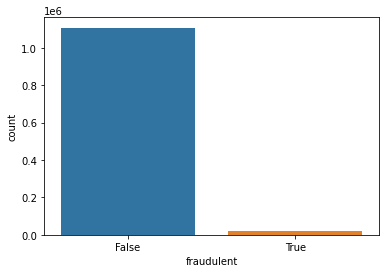

In [17]:
sns.countplot(df_data['fraudulent'])

In [18]:
X = df_data.drop(['fraudulent'],axis=1)

y = df_data['fraudulent']

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [21]:
X_train.head()

,callCost,startDate_months,endDate_months,startDate_day_of_months,endDate_day_of_months,startDate_year,endDate_year,duration,callType_Intl,callType_Local,callType_Mobile,callType_National,callType_PRS
674569,0.000967,0.0,0.0,0.066667,0.066667,1.0,1.0,0.877526,0,0,0,1,0
260848,0.013112,0.0,0.0,0.500000,0.500000,1.0,1.0,0.894060,0,0,0,1,0
409639,0.001319,0.0,0.0,0.933333,0.933333,1.0,1.0,0.876301,0,0,1,0,0
263353,0.006427,0.0,0.0,0.700000,0.700000,1.0,1.0,0.884874,1,0,0,0,0
44032,0.003536,0.0,0.0,0.900000,0.900000,1.0,1.0,0.895897,0,1,0,0,0


In [22]:
y_train.head()

674569    False
260848    False
409639    False
263353    False
44032     False
Name: fraudulent, dtype: bool

In [23]:
X_train.columns

Index(['callCost', 'startDate_months', 'endDate_months',
       'startDate_day_of_months', 'endDate_day_of_months', 'startDate_year',
       'endDate_year', 'duration', 'callType_Intl', 'callType_Local',
       'callType_Mobile', 'callType_National', 'callType_PRS'],
      dtype='object')

<AxesSubplot:>

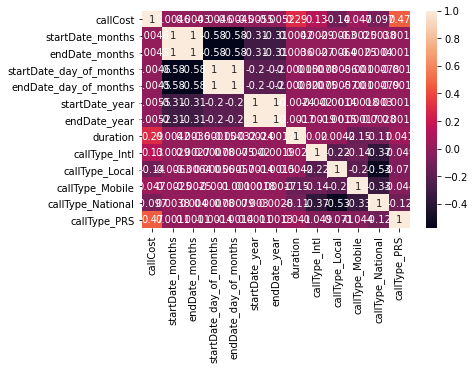

In [24]:
sns.heatmap(X_train.corr(),annot=True)

In [25]:
target = y_train
train = X_train

In [26]:
import matplotlib.pyplot as plt

In [27]:
##Dummy classifier

from sklearn.dummy import DummyClassifier

In [28]:
dummy = DummyClassifier(strategy='most_frequent', random_state=42)
dummy.fit(X_train, y_train)
dummy.score(X_test, y_test)

0.9806414416347108

In [29]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=10000, n_classes=2, \
                          weights=[0.95,0.05], random_state=42)

C:\Users\manji\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:17: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping, defaultdict


In [30]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42).fit(X_train, y_train)
model.score(X_test,y_test)

C:\Users\manji\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


0.9966453031562575

In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, model.predict(X_test))

array([[365227,    464],
       [   787,   6432]], dtype=int64)

In [32]:
from sklearn.metrics import precision_score, recall_score, f1_score
print('Precision: ',precision_score(y_test, model.predict(X_test)))
print('Recall: ',recall_score(y_test, model.predict(X_test)))
print('F1 score: ', f1_score(y_test, model.predict(X_test)))

Precision:  0.9327146171693735
Recall:  0.8909821304889874
F1 score:  0.9113708820403826


In [55]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [56]:
#Apply RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
ytrain_pred = rf_model.predict_proba(X_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = rf_model.predict_proba(X_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

RF train roc-auc: 0.9999185922276903
RF test roc-auc: 0.9064238780291383


In [57]:
#Apply Logistic Regression
from sklearn.linear_model import LogisticRegression
log_classifier=LogisticRegression()
log_classifier.fit(X_train, y_train)
ytrain_pred = log_classifier.predict_proba(X_train)
print('Logistic train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = log_classifier.predict_proba(X_test)
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Logistic train roc-auc: 0.9198919502500449
Logistic test roc-auc: 0.9202174390511751


In [59]:
#Adaboost Classifier
from sklearn.ensemble import AdaBoostClassifier
ada_classifier = AdaBoostClassifier()
ada_classifier.fit(X_train, y_train)
ytrain_pred = ada_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = ada_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.9690989793986969
Adaboost test roc-auc: 0.9220248554066915


In [60]:
#KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
ytrain_pred = knn_classifier.predict_proba(X_train)
print('KNN train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = knn_classifier.predict_proba(X_test)
print('KNN test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

KNN train roc-auc: 0.97548365244765
KNN test roc-auc: 0.789397100812651


Now we will focus on selecting the best threshold for maximum accuracy

In [61]:
pred=[]
for model in [rf_model,log_classifier,ada_classifier,knn_classifier]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

Ensemble test roc-auc: 0.925058569441394


In [62]:
pd.concat(pred,axis=1)

,0,1,2,3
0,0.0,0.000519,0.449615,0.0
1,0.0,0.008140,0.471501,0.0
2,0.0,0.037596,0.471495,0.0
3,0.1,0.082605,0.465725,0.0
4,0.2,0.350979,0.492467,0.2
...,...,...,...,...
1995,0.0,0.466890,0.495610,0.2
1996,0.0,0.017427,0.477140,0.0
1997,0.0,0.011574,0.466307,0.0
1998,0.2,0.049248,0.494250,0.0


In [63]:
final_prediction

0       0.112534
1       0.119910
2       0.127273
3       0.162082
4       0.310862
          ...   
1995    0.290625
1996    0.123642
1997    0.119470
1998    0.185874
1999    0.116361
Length: 2000, dtype: float64

In [65]:
##calculate the ROC Curve

fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
thresholds

array([0.87921181, 0.75934484, 0.72287394, 0.663609  , 0.66021404,
       0.62293665, 0.61808853, 0.58200094, 0.58058075, 0.55466881,
       0.54751058, 0.54362062, 0.52842006, 0.51658678, 0.50921768,
       0.50592427, 0.50391655, 0.4995441 , 0.47847899, 0.47546162,
       0.46676294, 0.45074207, 0.44181673, 0.43475438, 0.43227196,
       0.42718366, 0.40682663, 0.38989418, 0.38501231, 0.38283045,
       0.37926631, 0.37907746, 0.3735252 , 0.37211343, 0.35445188,
       0.34860569, 0.34833475, 0.34570846, 0.34411015, 0.34301017,
       0.33660806, 0.33379422, 0.33316553, 0.32146218, 0.31729975,
       0.3108616 , 0.3067647 , 0.3066485 , 0.29375038, 0.29322803,
       0.29266959, 0.29062491, 0.28884442, 0.28456266, 0.27916631,
       0.27894293, 0.26118514, 0.26064791, 0.25524624, 0.25507625,
       0.25112791, 0.25052993, 0.24882415, 0.2472341 , 0.24391486,
       0.24339504, 0.24076081, 0.24009242, 0.23822507, 0.2371453 ,
       0.22525332, 0.22503932, 0.22259921, 0.22140121, 0.22121

In [66]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],axis=1)
accuracy_ls.columns = ['thresholds','accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
46,0.306765,0.9615
47,0.306648,0.9610
45,0.310862,0.9610
44,0.317300,0.9610
43,0.321462,0.9605


In [67]:
accuracy_ls

,thresholds,accuracy
46,0.306765,0.9615
47,0.306648,0.9610
45,0.310862,0.9610
44,0.317300,0.9610
43,0.321462,0.9605
...,...,...
116,0.115176,0.1640
117,0.115156,0.1635
118,0.075241,0.0695
119,0.075232,0.0690


In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0,1],[0,1], color='darkblue', linestyle='--')
    plt.xlabel('False positive Rate')
    plt.ylabel('True positive Rate')
    plt.title('Receiver Operating Charateristic (ROC) curve')
    plt.legend()
    plt.show()

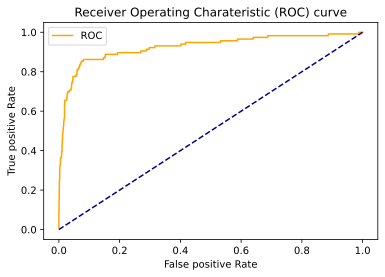

In [72]:
plot_roc_curve(fpr, tpr)